Họ và tên: Phạm Đức Thể

MSSV: 19522253

Lớp: DS200.M21

Preprocessing Data - 30/06/2022

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/17SxZCo4mZ8gSOKVp6qDHTwB-g_5hs2G2?usp=sharing)

# **Pre-processing Data using Pandas**

## Import Libraries

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import clear_output

import requests
import numpy as np
import pandas as pd
import re
import time
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
pd.options.display.max_rows

sns.set()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


## Read Dataset

In [2]:
PATH = '/content/drive/MyDrive/TÀI LIỆU HỌC TẬP ĐẠI HỌC 2019-2023/NĂM 3 2021-2022/HỌC KỲ 2 2021 - 2022/DS200.M21 - PHÂN TÍCH DỮ LIỆU LỚN/FINAL PROJECT/Predict Flight Delays/Dataset/'

### Data tháng 1/2021

In [3]:
df1 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2021_M1.csv')
df1.head()
df1.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2021,1,1,5,2,1/5/2021 12:00:00 AM,OO,20304,OO,N263SY,3695,14831,1483106,32457,SJC,"San Jose, CA",CA,6,California,91,14869,1486903,34614,SLC,"Salt Lake City, UT",UT,49,Utah,87,1712,1704.0,-8.0,0.0,0.0,-1.0,1700-1759,13.0,1717.0,1952.0,8.0,2010,2000.0,-10.0,0.0,0.0,-1.0,2000-2059,0.0,0.0,118.0,116.0,95.0,1.0,584.0,3,0
1,2021,1,1,5,2,1/5/2021 12:00:00 AM,OO,20304,OO,N831SK,3696,14683,1468305,33214,SAT,"San Antonio, TX",TX,48,Texas,74,13487,1348702,31650,MSP,"Minneapolis, MN",MN,27,Minnesota,63,1415,1412.0,-3.0,0.0,0.0,-1.0,1400-1459,15.0,1427.0,1650.0,3.0,1708,1653.0,-15.0,0.0,0.0,-1.0,1700-1759,0.0,0.0,173.0,161.0,143.0,1.0,1097.0,5,0
2,2021,1,1,5,2,1/5/2021 12:00:00 AM,OO,20304,OO,N304SY,3698,14771,1477104,32457,SFO,"San Francisco, CA",CA,6,California,91,12892,1289208,32575,LAX,"Los Angeles, CA",CA,6,California,91,930,925.0,-5.0,0.0,0.0,-1.0,0900-0959,10.0,935.0,1032.0,8.0,1107,1040.0,-27.0,0.0,0.0,-2.0,1100-1159,0.0,0.0,97.0,75.0,57.0,1.0,337.0,2,0
3,2021,1,1,5,2,1/5/2021 12:00:00 AM,OO,20304,OO,N280SY,3700,12892,1289208,32575,LAX,"Los Angeles, CA",CA,6,California,91,14771,1477104,32457,SFO,"San Francisco, CA",CA,6,California,91,1705,1655.0,-10.0,0.0,0.0,-1.0,1700-1759,14.0,1709.0,1812.0,7.0,1834,1819.0,-15.0,0.0,0.0,-1.0,1800-1859,0.0,0.0,89.0,84.0,63.0,1.0,337.0,2,0
4,2021,1,1,5,2,1/5/2021 12:00:00 AM,OO,20304,OO,N240SY,3701,13851,1385103,33851,OKC,"Oklahoma City, OK",OK,40,Oklahoma,73,14869,1486903,34614,SLC,"Salt Lake City, UT",UT,49,Utah,87,1825,1819.0,-6.0,0.0,0.0,-1.0,1800-1859,13.0,1832.0,1946.0,4.0,2004,1950.0,-14.0,0.0,0.0,-1.0,2000-2059,0.0,0.0,159.0,151.0,134.0,1.0,866.0,4,0


(361428, 56)

### Data tháng 2/2021

In [4]:
df2 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2021_M2.csv')
df2.head()
df2.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2021,1,2,19,5,2/19/2021 12:00:00 AM,OH,20397,OH,N552NN,5581,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,13851,1385103,33851,OKC,"Oklahoma City, OK",OK,40,Oklahoma,73,1310,1306.0,-4.0,0.0,0.0,-1.0,1300-1359,23.0,1329.0,1454.0,5.0,1510,1459.0,-11.0,0.0,0.0,-1.0,1500-1559,0.0,0.0,180.0,173.0,145.0,1.0,940.0,4,0
1,2021,1,2,21,7,2/21/2021 12:00:00 AM,OH,20397,OH,N559NN,5581,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,13851,1385103,33851,OKC,"Oklahoma City, OK",OK,40,Oklahoma,73,1310,1304.0,-6.0,0.0,0.0,-1.0,1300-1359,23.0,1327.0,1509.0,4.0,1510,1513.0,3.0,3.0,0.0,0.0,1500-1559,0.0,0.0,180.0,189.0,162.0,1.0,940.0,4,0
2,2021,1,2,22,1,2/22/2021 12:00:00 AM,OH,20397,OH,N556NN,5581,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,13851,1385103,33851,OKC,"Oklahoma City, OK",OK,40,Oklahoma,73,1310,1306.0,-4.0,0.0,0.0,-1.0,1300-1359,20.0,1326.0,1450.0,4.0,1510,1454.0,-16.0,0.0,0.0,-2.0,1500-1559,0.0,0.0,180.0,168.0,144.0,1.0,940.0,4,0
3,2021,1,2,25,4,2/25/2021 12:00:00 AM,OH,20397,OH,N602NN,5581,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,13851,1385103,33851,OKC,"Oklahoma City, OK",OK,40,Oklahoma,73,1310,1306.0,-4.0,0.0,0.0,-1.0,1300-1359,34.0,1340.0,1513.0,3.0,1510,1516.0,6.0,6.0,0.0,0.0,1500-1559,0.0,0.0,180.0,190.0,153.0,1.0,940.0,4,0
4,2021,1,2,26,5,2/26/2021 12:00:00 AM,OH,20397,OH,N613NN,5581,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,13851,1385103,33851,OKC,"Oklahoma City, OK",OK,40,Oklahoma,73,1310,1303.0,-7.0,0.0,0.0,-1.0,1300-1359,24.0,1327.0,1452.0,4.0,1510,1456.0,-14.0,0.0,0.0,-1.0,1500-1559,0.0,0.0,180.0,173.0,145.0,1.0,940.0,4,0


(332468, 56)

### Data tháng 3/2021

In [5]:
df3 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2021_M3.csv')
df3.head()
df3.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2021,1,3,3,3,3/3/2021 12:00:00 AM,OO,20304,OO,N728SK,3133,14794,1479405,34794,SGU,"St. George, UT",UT,49,Utah,87,14107,1410702,30466,PHX,"Phoenix, AZ",AZ,4,Arizona,81,724,714.0,-10.0,0.0,0.0,-1.0,0700-0759,10.0,724.0,813.0,5.0,843,818.0,-25.0,0.0,0.0,-2.0,0800-0859,0.0,0.0,79.0,64.0,49.0,1.0,262.0,2,0.0
1,2021,1,3,3,3,3/3/2021 12:00:00 AM,OO,20304,OO,N752SK,3134,14107,1410702,30466,PHX,"Phoenix, AZ",AZ,4,Arizona,81,14794,1479405,34794,SGU,"St. George, UT",UT,49,Utah,87,922,917.0,-5.0,0.0,0.0,-1.0,0900-0959,23.0,940.0,1028.0,3.0,1040,1031.0,-9.0,0.0,0.0,-1.0,1000-1059,0.0,0.0,78.0,74.0,48.0,1.0,262.0,2,0.0
2,2021,1,3,3,3,3/3/2021 12:00:00 AM,OO,20304,OO,N766SK,3135,13296,1329604,30721,MHT,"Manchester, NH",NH,33,New Hampshire,14,13930,1393007,30977,ORD,"Chicago, IL",IL,17,Illinois,41,1330,1321.0,-9.0,0.0,0.0,-1.0,1300-1359,15.0,1336.0,1445.0,16.0,1530,1501.0,-29.0,0.0,0.0,-2.0,1500-1559,0.0,0.0,180.0,160.0,129.0,1.0,843.0,4,0.0
3,2021,1,3,3,3,3/3/2021 12:00:00 AM,OO,20304,OO,N752EV,3136,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,15323,1532305,35323,TRI,"Bristol/Johnson City/Kingsport, TN",TN,47,Tennessee,54,1645,1636.0,-9.0,0.0,0.0,-1.0,1600-1659,27.0,1703.0,1955.0,7.0,2010,2002.0,-8.0,0.0,0.0,-1.0,2000-2059,0.0,0.0,145.0,146.0,112.0,1.0,868.0,4,0.0
4,2021,1,3,3,3,3/3/2021 12:00:00 AM,OO,20304,OO,N715SK,3137,14107,1410702,30466,PHX,"Phoenix, AZ",AZ,4,Arizona,81,10561,1056103,30561,BFL,"Bakersfield, CA",CA,6,California,91,1844,1838.0,-6.0,0.0,0.0,-1.0,1800-1859,13.0,1851.0,1900.0,3.0,1925,1903.0,-22.0,0.0,0.0,-2.0,1900-1959,0.0,0.0,101.0,85.0,69.0,1.0,425.0,2,0.0


(444476, 56)

### Data tháng 4/2021

In [6]:
df4 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2021_M4.csv')
df4.head()
df4.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2021,2,4,11,7,4/11/2021 12:00:00 AM,AS,19930,AS,N277AK,765,10821,1082106,30852,BWI,"Baltimore, MD",MD,24,Maryland,35,14747,1474703,30559,SEA,"Seattle, WA",WA,53,Washington,93,1730,1725.0,-5.0,0.0,0.0,-1.0,1700-1759,10.0,1735.0,1922.0,10.0,2021,1932.0,-49.0,0.0,0.0,-2.0,2000-2059,0.0,0.0,351.0,307.0,287.0,1.0,2335.0,10,0
1,2021,2,4,11,7,4/11/2021 12:00:00 AM,AS,19930,AS,N929VA,769,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,14771,1477104,32457,SFO,"San Francisco, CA",CA,6,California,91,755,755.0,0.0,0.0,0.0,0.0,0700-0759,26.0,821.0,1051.0,3.0,1130,1054.0,-36.0,0.0,0.0,-2.0,1100-1159,0.0,0.0,395.0,359.0,330.0,1.0,2586.0,11,0
2,2021,2,4,11,7,4/11/2021 12:00:00 AM,AS,19930,AS,N512AS,770,14747,1474703,30559,SEA,"Seattle, WA",WA,53,Washington,93,15304,1530402,33195,TPA,"Tampa, FL",FL,12,Florida,33,800,1223.0,263.0,263.0,1.0,12.0,0800-0859,22.0,1245.0,2013.0,6.0,1620,2019.0,239.0,239.0,1.0,12.0,1600-1659,0.0,0.0,320.0,296.0,268.0,1.0,2520.0,11,0
3,2021,2,4,11,7,4/11/2021 12:00:00 AM,AS,19930,AS,N546AS,772,14679,1467903,33570,SAN,"San Diego, CA",CA,6,California,91,11618,1161802,31703,EWR,"Newark, NJ",NJ,34,New Jersey,21,835,825.0,-10.0,0.0,0.0,-1.0,0800-0859,22.0,847.0,1632.0,8.0,1700,1640.0,-20.0,0.0,0.0,-2.0,1700-1759,0.0,0.0,325.0,315.0,285.0,1.0,2425.0,10,0
4,2021,2,4,11,7,4/11/2021 12:00:00 AM,AS,19930,AS,N546AS,773,11618,1161802,31703,EWR,"Newark, NJ",NJ,34,New Jersey,21,14679,1467903,33570,SAN,"San Diego, CA",CA,6,California,91,1755,1743.0,-12.0,0.0,0.0,-1.0,1700-1759,17.0,1800.0,2028.0,3.0,2057,2031.0,-26.0,0.0,0.0,-2.0,2000-2059,0.0,0.0,362.0,348.0,328.0,1.0,2425.0,10,0


(450637, 56)

### Data tháng 5/2021

In [7]:
df5 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2021_M5.csv')
df5.head()
df5.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2021,2,5,29,6,5/29/2021 12:00:00 AM,OH,20397,OH,N555NN,5225,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,10785,1078502,30785,BTV,"Burlington, VT",VT,50,Vermont,16,2035,2050.0,15.0,15.0,1.0,1.0,2000-2059,20.0,2110.0,2252.0,3.0,2256,2255.0,-1.0,0.0,0.0,-1.0,2200-2259,0.0,0.0,141.0,125.0,102.0,1.0,761.0,4,0
1,2021,2,5,30,7,5/30/2021 12:00:00 AM,OH,20397,OH,N563NN,5225,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,10785,1078502,30785,BTV,"Burlington, VT",VT,50,Vermont,16,2035,2030.0,-5.0,0.0,0.0,-1.0,2000-2059,21.0,2051.0,2233.0,3.0,2256,2236.0,-20.0,0.0,0.0,-2.0,2200-2259,0.0,0.0,141.0,126.0,102.0,1.0,761.0,4,0
2,2021,2,5,31,1,5/31/2021 12:00:00 AM,OH,20397,OH,N578NN,5225,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,10785,1078502,30785,BTV,"Burlington, VT",VT,50,Vermont,16,2035,2025.0,-10.0,0.0,0.0,-1.0,2000-2059,44.0,2109.0,2247.0,5.0,2256,2252.0,-4.0,0.0,0.0,-1.0,2200-2259,0.0,0.0,141.0,147.0,98.0,1.0,761.0,4,0
3,2021,2,5,6,4,5/6/2021 12:00:00 AM,OH,20397,OH,N607NN,5226,11267,1126702,31267,DAY,"Dayton, OH",OH,39,Ohio,44,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,1616,1612.0,-4.0,0.0,0.0,-1.0,1600-1659,30.0,1642.0,1752.0,16.0,1802,1808.0,6.0,6.0,0.0,0.0,1800-1859,0.0,0.0,166.0,176.0,130.0,1.0,861.0,4,0
4,2021,2,5,7,5,5/7/2021 12:00:00 AM,OH,20397,OH,N549NN,5226,11267,1126702,31267,DAY,"Dayton, OH",OH,39,Ohio,44,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,1616,1626.0,10.0,10.0,0.0,0.0,1600-1659,10.0,1636.0,1749.0,16.0,1802,1805.0,3.0,3.0,0.0,0.0,1800-1859,0.0,0.0,166.0,159.0,133.0,1.0,861.0,4,0


(495544, 56)

### Data tháng 6/2021

In [8]:
df6 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2021_M6.csv')
df6.head()
df6.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2021,2,6,2,3,6/2/2021 12:00:00 AM,AA,19805,AA,N949AN,1677,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,13198,1319801,33198,MCI,"Kansas City, MO",MO,29,Missouri,64,1850,1851.0,1.0,1.0,0.0,0.0,1800-1859,24.0,1915.0,2010.0,5.0,2023,2015.0,-8.0,0.0,0.0,-1.0,2000-2059,0.0,0.0,153.0,144.0,115.0,1.0,808.0,4,0.0
1,2021,2,6,3,4,6/3/2021 12:00:00 AM,AA,19805,AA,N378SC,1677,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,13303,1330303,32467,MIA,"Miami, FL",FL,12,Florida,33,805,801.0,-4.0,0.0,0.0,-1.0,0800-0859,16.0,817.0,1102.0,11.0,1120,1113.0,-7.0,0.0,0.0,-1.0,1100-1159,0.0,0.0,195.0,192.0,165.0,1.0,1096.0,5,0.0
2,2021,2,6,4,5,6/4/2021 12:00:00 AM,AA,19805,AA,N329SL,1677,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,13303,1330303,32467,MIA,"Miami, FL",FL,12,Florida,33,805,802.0,-3.0,0.0,0.0,-1.0,0800-0859,17.0,819.0,1101.0,6.0,1120,1107.0,-13.0,0.0,0.0,-1.0,1100-1159,0.0,0.0,195.0,185.0,162.0,1.0,1096.0,5,0.0
3,2021,2,6,5,6,6/5/2021 12:00:00 AM,AA,19805,AA,N302SA,1677,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,13303,1330303,32467,MIA,"Miami, FL",FL,12,Florida,33,805,757.0,-8.0,0.0,0.0,-1.0,0800-0859,19.0,816.0,1045.0,21.0,1120,1106.0,-14.0,0.0,0.0,-1.0,1100-1159,0.0,0.0,195.0,189.0,149.0,1.0,1096.0,5,0.0
4,2021,2,6,6,7,6/6/2021 12:00:00 AM,AA,19805,AA,N378SC,1677,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,13303,1330303,32467,MIA,"Miami, FL",FL,12,Florida,33,805,NaN,NaN,NaN,NaN,NaN,0800-0859,NaN,NaN,NaN,NaN,1120,NaN,NaN,NaN,NaN,NaN,1100-1159,1.0,0.0,195.0,NaN,NaN,1.0,1096.0,5,0.0


(546124, 56)

### Data tháng 7/2021

In [9]:
df7 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2021_M7.csv')
df7.head()
df7.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2021,3,7,13,2,7/13/2021 12:00:00 AM,WN,19393,WN,N8627B,2268,14679,1467903,33570,SAN,"San Diego, CA",CA,6,California,91,11292,1129202,30325,DEN,"Denver, CO",CO,8,Colorado,82,1825,1820.0,-5.0,0.0,0.0,-1.0,1800-1859,9.0,1829.0,2120.0,27.0,2140,2147.0,7.0,7.0,0.0,0.0,2100-2159,0.0,0.0,135.0,147.0,111.0,1.0,853.0,4,0
1,2021,3,7,13,2,7/13/2021 12:00:00 AM,WN,19393,WN,N231WN,3815,14679,1467903,33570,SAN,"San Diego, CA",CA,6,California,91,11292,1129202,30325,DEN,"Denver, CO",CO,8,Colorado,82,1505,NaN,NaN,NaN,NaN,NaN,1500-1559,NaN,NaN,NaN,NaN,1825,NaN,NaN,NaN,NaN,NaN,1800-1859,1.0,0.0,140.0,NaN,NaN,1.0,853.0,4,0
2,2021,3,7,13,2,7/13/2021 12:00:00 AM,WN,19393,WN,N8745K,5013,14679,1467903,33570,SAN,"San Diego, CA",CA,6,California,91,11292,1129202,30325,DEN,"Denver, CO",CO,8,Colorado,82,1210,1234.0,24.0,24.0,1.0,1.0,1200-1259,14.0,1248.0,1541.0,7.0,1530,1548.0,18.0,18.0,1.0,1.0,1500-1559,0.0,0.0,140.0,134.0,113.0,1.0,853.0,4,0
3,2021,3,7,13,2,7/13/2021 12:00:00 AM,WN,19393,WN,N8728Q,5306,14679,1467903,33570,SAN,"San Diego, CA",CA,6,California,91,11292,1129202,30325,DEN,"Denver, CO",CO,8,Colorado,82,2050,2209.0,79.0,79.0,1.0,5.0,2000-2059,12.0,2221.0,115.0,7.0,5,122.0,77.0,77.0,1.0,5.0,0001-0559,0.0,0.0,135.0,133.0,114.0,1.0,853.0,4,0
4,2021,3,7,13,2,7/13/2021 12:00:00 AM,WN,19393,WN,N8749Q,1111,14679,1467903,33570,SAN,"San Diego, CA",CA,6,California,91,12173,1217305,32134,HNL,"Honolulu, HI",HI,15,Hawaii,2,1840,1841.0,1.0,1.0,0.0,0.0,1800-1859,13.0,1854.0,2113.0,11.0,2140,2124.0,-16.0,0.0,0.0,-2.0,2100-2159,0.0,0.0,360.0,343.0,319.0,1.0,2614.0,11,0


(583258, 56)

### Data tháng 8/2021

In [10]:
df8 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2021_M8.csv')
df8.head()
df8.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2021,3,8,5,4,8/5/2021 12:00:00 AM,OH,20397,OH,N525AE,5574,10599,1059904,30599,BHM,"Birmingham, AL",AL,1,Alabama,51,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1914,1906.0,-8.0,0.0,0.0,-1.0,1900-1959,17.0,1923.0,2128.0,9.0,2151,2137.0,-14.0,0.0,0.0,-1.0,2100-2159,0.0,0.0,97.0,91.0,65.0,1.0,350.0,2,0
1,2021,3,8,6,5,8/6/2021 12:00:00 AM,OH,20397,OH,N708PS,5574,10599,1059904,30599,BHM,"Birmingham, AL",AL,1,Alabama,51,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1914,1948.0,34.0,34.0,1.0,2.0,1900-1959,14.0,2002.0,2159.0,23.0,2151,2222.0,31.0,31.0,1.0,2.0,2100-2159,0.0,0.0,97.0,94.0,57.0,1.0,350.0,2,0
2,2021,3,8,8,7,8/8/2021 12:00:00 AM,OH,20397,OH,N712PS,5574,10599,1059904,30599,BHM,"Birmingham, AL",AL,1,Alabama,51,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1914,1913.0,-1.0,0.0,0.0,-1.0,1900-1959,11.0,1924.0,2119.0,29.0,2151,2148.0,-3.0,0.0,0.0,-1.0,2100-2159,0.0,0.0,97.0,95.0,55.0,1.0,350.0,2,0
3,2021,3,8,9,1,8/9/2021 12:00:00 AM,OH,20397,OH,N503AE,5574,10599,1059904,30599,BHM,"Birmingham, AL",AL,1,Alabama,51,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1914,1906.0,-8.0,0.0,0.0,-1.0,1900-1959,11.0,1917.0,2116.0,15.0,2151,2131.0,-20.0,0.0,0.0,-2.0,2100-2159,0.0,0.0,97.0,85.0,59.0,1.0,350.0,2,0
4,2021,3,8,10,2,8/10/2021 12:00:00 AM,OH,20397,OH,N513AE,5574,10599,1059904,30599,BHM,"Birmingham, AL",AL,1,Alabama,51,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1914,2008.0,54.0,54.0,1.0,3.0,1900-1959,22.0,2030.0,2227.0,12.0,2151,2239.0,48.0,48.0,1.0,3.0,2100-2159,0.0,0.0,97.0,91.0,57.0,1.0,350.0,2,0


(579179, 56)

### Data tháng 9/2021

In [11]:
df9 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2021_M9.csv')
df9.head()
df9.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2021,3,9,3,5,9/3/2021 12:00:00 AM,OH,20397,OH,N509AE,5682,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,11267,1126702,31267,DAY,"Dayton, OH",OH,39,Ohio,44,1643,1637.0,-6.0,0.0,0.0,-1.0,1600-1659,23.0,1700.0,1756.0,24.0,1812,1820.0,8.0,8.0,0.0,0.0,1800-1859,0.0,0.0,89.0,103.0,56.0,1.0,370.0,2,0
1,2021,3,9,4,6,9/4/2021 12:00:00 AM,OH,20397,OH,N712PS,5682,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,11267,1126702,31267,DAY,"Dayton, OH",OH,39,Ohio,44,1643,1634.0,-9.0,0.0,0.0,-1.0,1600-1659,23.0,1657.0,1753.0,5.0,1812,1758.0,-14.0,0.0,0.0,-1.0,1800-1859,0.0,0.0,89.0,84.0,56.0,1.0,370.0,2,0
2,2021,3,9,5,7,9/5/2021 12:00:00 AM,OH,20397,OH,N573NN,5682,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,11267,1126702,31267,DAY,"Dayton, OH",OH,39,Ohio,44,1643,1636.0,-7.0,0.0,0.0,-1.0,1600-1659,19.0,1655.0,1750.0,11.0,1812,1801.0,-11.0,0.0,0.0,-1.0,1800-1859,0.0,0.0,89.0,85.0,55.0,1.0,370.0,2,0
3,2021,3,9,6,1,9/6/2021 12:00:00 AM,OH,20397,OH,N523AE,5682,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,11267,1126702,31267,DAY,"Dayton, OH",OH,39,Ohio,44,1643,1640.0,-3.0,0.0,0.0,-1.0,1600-1659,17.0,1657.0,1753.0,5.0,1812,1758.0,-14.0,0.0,0.0,-1.0,1800-1859,0.0,0.0,89.0,78.0,56.0,1.0,370.0,2,0
4,2021,3,9,7,2,9/7/2021 12:00:00 AM,OH,20397,OH,N542EA,5682,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,11267,1126702,31267,DAY,"Dayton, OH",OH,39,Ohio,44,1643,1636.0,-7.0,0.0,0.0,-1.0,1600-1659,24.0,1700.0,1752.0,10.0,1812,1802.0,-10.0,0.0,0.0,-1.0,1800-1859,0.0,0.0,89.0,86.0,52.0,1.0,370.0,2,0


(538051, 56)

### Data tháng 10/2021

In [12]:
df10 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2021_M10.csv')
df10.head()
df10.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2021,4,10,7,4,10/7/2021 12:00:00 AM,WN,19393,WN,N8557Q,1362,12889,1288903,32211,LAS,"Las Vegas, NV",NV,32,Nevada,85,14893,1489302,33192,SMF,"Sacramento, CA",CA,6,California,91,2010,2018.0,8.0,8.0,0.0,0.0,2000-2059,9.0,2027.0,2134.0,4.0,2140,2138.0,-2.0,0.0,0.0,-1.0,2100-2159,0.0,0.0,90.0,80.0,67.0,1.0,397.0,2,0
1,2021,4,10,7,4,10/7/2021 12:00:00 AM,WN,19393,WN,N932WN,2245,12889,1288903,32211,LAS,"Las Vegas, NV",NV,32,Nevada,85,14893,1489302,33192,SMF,"Sacramento, CA",CA,6,California,91,1830,1953.0,83.0,83.0,1.0,5.0,1800-1859,10.0,2003.0,2111.0,4.0,2005,2115.0,70.0,70.0,1.0,4.0,2000-2059,0.0,0.0,95.0,82.0,68.0,1.0,397.0,2,0
2,2021,4,10,7,4,10/7/2021 12:00:00 AM,WN,19393,WN,N218WN,2389,12889,1288903,32211,LAS,"Las Vegas, NV",NV,32,Nevada,85,14893,1489302,33192,SMF,"Sacramento, CA",CA,6,California,91,1440,1500.0,20.0,20.0,1.0,1.0,1400-1459,10.0,1510.0,1619.0,3.0,1615,1622.0,7.0,7.0,0.0,0.0,1600-1659,0.0,0.0,95.0,82.0,69.0,1.0,397.0,2,0
3,2021,4,10,7,4,10/7/2021 12:00:00 AM,WN,19393,WN,N7726A,5030,12889,1288903,32211,LAS,"Las Vegas, NV",NV,32,Nevada,85,14893,1489302,33192,SMF,"Sacramento, CA",CA,6,California,91,800,812.0,12.0,12.0,0.0,0.0,0800-0859,10.0,822.0,928.0,3.0,935,931.0,-4.0,0.0,0.0,-1.0,0900-0959,0.0,0.0,95.0,79.0,66.0,1.0,397.0,2,0
4,2021,4,10,7,4,10/7/2021 12:00:00 AM,WN,19393,WN,N8623F,358,12889,1288903,32211,LAS,"Las Vegas, NV",NV,32,Nevada,85,14908,1490803,32575,SNA,"Santa Ana, CA",CA,6,California,91,735,734.0,-1.0,0.0,0.0,-1.0,0700-0759,17.0,751.0,835.0,3.0,840,838.0,-2.0,0.0,0.0,-1.0,0800-0859,0.0,0.0,65.0,64.0,44.0,1.0,226.0,1,0


(564788, 56)

### Data tháng 11/2021

In [13]:
df11 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2021_M11.csv')
df11.head()
df11.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2021,4,11,26,5,11/26/2021 12:00:00 AM,YV,20378,YV,N82333,6228,14492,1449202,34492,RDU,"Raleigh/Durham, NC",NC,37,North Carolina,36,12264,1226402,30852,IAD,"Washington, DC",VA,51,Virginia,38,1430,1428.0,-2.0,0.0,0.0,-1.0,1400-1459,39.0,1507.0,1606.0,13.0,1550,1619.0,29.0,29.0,1.0,1.0,1500-1559,0.0,0.0,80.0,111.0,59.0,1.0,224.0,1,0
1,2021,4,11,30,2,11/30/2021 12:00:00 AM,YV,20378,YV,N83329,6038,11193,1119302,33105,CVG,"Cincinnati, OH",KY,21,Kentucky,52,13930,1393007,30977,ORD,"Chicago, IL",IL,17,Illinois,41,1820,1820.0,0.0,0.0,0.0,0.0,1800-1859,34.0,1854.0,1906.0,10.0,1854,1916.0,22.0,22.0,1.0,1.0,1800-1859,0.0,0.0,94.0,116.0,72.0,1.0,264.0,2,0
2,2021,4,11,26,5,11/26/2021 12:00:00 AM,YV,20378,YV,N82366,6251,12266,1226603,31453,IAH,"Houston, TX",TX,48,Texas,74,14986,1498603,34986,SRQ,"Sarasota/Bradenton, FL",FL,12,Florida,33,955,950.0,-5.0,0.0,0.0,-1.0,0900-0959,57.0,1047.0,1332.0,5.0,1306,1337.0,31.0,31.0,1.0,2.0,1300-1359,0.0,0.0,131.0,167.0,105.0,1.0,796.0,4,0
3,2021,4,11,24,3,11/24/2021 12:00:00 AM,YV,20378,YV,N84378,6079,14986,1498603,34986,SRQ,"Sarasota/Bradenton, FL",FL,12,Florida,33,12264,1226402,30852,IAD,"Washington, DC",VA,51,Virginia,38,1355,1355.0,0.0,0.0,0.0,0.0,1300-1359,40.0,1435.0,1643.0,5.0,1625,1648.0,23.0,23.0,1.0,1.0,1600-1659,0.0,0.0,150.0,173.0,128.0,1.0,849.0,4,0
4,2021,4,11,22,1,11/22/2021 12:00:00 AM,YV,20378,YV,N86322,6079,12264,1226402,30852,IAD,"Washington, DC",VA,51,Virginia,38,14986,1498603,34986,SRQ,"Sarasota/Bradenton, FL",FL,12,Florida,33,825,824.0,-1.0,0.0,0.0,-1.0,0800-0859,25.0,849.0,1111.0,12.0,1103,1123.0,20.0,20.0,1.0,1.0,1100-1159,0.0,0.0,158.0,179.0,142.0,1.0,849.0,4,0


(547559, 56)

### Data tháng 12/2021

In [14]:
df12 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2021_M12.csv')
df12.head()
df12.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2021,4,12,15,3,12/15/2021 12:00:00 AM,WN,19393,WN,N943WN,1682,13577,1357702,31135,MYR,"Myrtle Beach, SC",SC,45,South Carolina,37,13232,1323202,30977,MDW,"Chicago, IL",IL,17,Illinois,41,1345,1341.0,-4.0,0.0,0.0,-1.0,1300-1359,11.0,1352.0,1439.0,5.0,1500,1444.0,-16.0,0.0,0.0,-2.0,1500-1559,0.0,0.0,135.0,123.0,107.0,1.0,738.0,3,0
1,2021,4,12,15,3,12/15/2021 12:00:00 AM,WN,19393,WN,N8602F,1683,13796,1379608,32457,OAK,"Oakland, CA",CA,6,California,91,10140,1014005,30140,ABQ,"Albuquerque, NM",NM,35,New Mexico,86,1810,1842.0,32.0,32.0,1.0,2.0,1800-1859,13.0,1855.0,2137.0,6.0,2125,2143.0,18.0,18.0,1.0,1.0,2100-2159,0.0,0.0,135.0,121.0,102.0,1.0,889.0,4,0
2,2021,4,12,15,3,12/15/2021 12:00:00 AM,WN,19393,WN,N453WN,157,13796,1379608,32457,OAK,"Oakland, CA",CA,6,California,91,10423,1042302,30423,AUS,"Austin, TX",TX,48,Texas,74,940,1030.0,50.0,50.0,1.0,3.0,0900-0959,14.0,1044.0,1540.0,11.0,1500,1551.0,51.0,51.0,1.0,3.0,1500-1559,0.0,0.0,200.0,201.0,176.0,1.0,1497.0,6,0
3,2021,4,12,15,3,12/15/2021 12:00:00 AM,WN,19393,WN,N225WN,265,13796,1379608,32457,OAK,"Oakland, CA",CA,6,California,91,10666,1066602,30666,BLI,"Bellingham, WA",WA,53,Washington,93,1030,1042.0,12.0,12.0,0.0,0.0,1000-1059,15.0,1057.0,1237.0,3.0,1245,1240.0,-5.0,0.0,0.0,-1.0,1200-1259,0.0,0.0,135.0,118.0,100.0,1.0,764.0,4,0
4,2021,4,12,15,3,12/15/2021 12:00:00 AM,WN,19393,WN,N254WN,1484,13796,1379608,32457,OAK,"Oakland, CA",CA,6,California,91,10666,1066602,30666,BLI,"Bellingham, WA",WA,53,Washington,93,1900,1923.0,23.0,23.0,1.0,1.0,1900-1959,18.0,1941.0,2126.0,4.0,2120,2130.0,10.0,10.0,0.0,0.0,2100-2159,0.0,0.0,140.0,127.0,105.0,1.0,764.0,4,0


(551885, 56)

### Data tháng 1/2022

In [15]:
df13 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2022_M1.csv')
df13.head()
df13.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2022,1,1,14,5,1/14/2022 12:00:00 AM,YX,20452,YX,N119HQ,4879,11066,1106606,31066,CMH,"Columbus, OH",OH,39,Ohio,44,11278,1127805,30852,DCA,"Washington, DC",VA,51,Virginia,38,1224,1221.0,-3.0,0.0,0.0,-1.0,1200-1259,28.0,1249.0,1352.0,4.0,1352,1356.0,4.0,4.0,0.0,0.0,1300-1359,0.0,0.0,88.0,95.0,63.0,1.0,323.0,2,0
1,2022,1,1,15,6,1/15/2022 12:00:00 AM,YX,20452,YX,N122HQ,4879,11066,1106606,31066,CMH,"Columbus, OH",OH,39,Ohio,44,11278,1127805,30852,DCA,"Washington, DC",VA,51,Virginia,38,1224,1214.0,-10.0,0.0,0.0,-1.0,1200-1259,19.0,1233.0,1323.0,5.0,1352,1328.0,-24.0,0.0,0.0,-2.0,1300-1359,0.0,0.0,88.0,74.0,50.0,1.0,323.0,2,0
2,2022,1,1,16,7,1/16/2022 12:00:00 AM,YX,20452,YX,N412YX,4879,11066,1106606,31066,CMH,"Columbus, OH",OH,39,Ohio,44,11278,1127805,30852,DCA,"Washington, DC",VA,51,Virginia,38,1224,1218.0,-6.0,0.0,0.0,-1.0,1200-1259,16.0,1234.0,1327.0,12.0,1352,1339.0,-13.0,0.0,0.0,-1.0,1300-1359,0.0,0.0,88.0,81.0,53.0,1.0,323.0,2,0
3,2022,1,1,17,1,1/17/2022 12:00:00 AM,YX,20452,YX,N405YX,4879,11066,1106606,31066,CMH,"Columbus, OH",OH,39,Ohio,44,11278,1127805,30852,DCA,"Washington, DC",VA,51,Virginia,38,1224,1217.0,-7.0,0.0,0.0,-1.0,1200-1259,32.0,1249.0,1345.0,16.0,1352,1401.0,9.0,9.0,0.0,0.0,1300-1359,0.0,0.0,88.0,104.0,56.0,1.0,323.0,2,0
4,2022,1,1,18,2,1/18/2022 12:00:00 AM,YX,20452,YX,N420YX,4879,11066,1106606,31066,CMH,"Columbus, OH",OH,39,Ohio,44,11278,1127805,30852,DCA,"Washington, DC",VA,51,Virginia,38,1224,1218.0,-6.0,0.0,0.0,-1.0,1200-1259,11.0,1229.0,1317.0,6.0,1352,1323.0,-29.0,0.0,0.0,-2.0,1300-1359,0.0,0.0,88.0,65.0,48.0,1.0,323.0,2,0


(537902, 56)

### Data tháng 2/2022

In [16]:
df14 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2022_M2.csv')
df14.head()
df14.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2022,1,2,1,2,2/1/2022 12:00:00 AM,9E,20363,9E,N297PQ,4628,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,15919,1591904,31834,XNA,"Fayetteville, AR",AR,5,Arkansas,71,1318,1312.0,-6.0,0.0,0.0,-1.0,1300-1359,17.0,1329.0,1505.0,3.0,1552,1508.0,-44.0,0.0,0.0,-2.0,1500-1559,0.0,0.0,214.0,176.0,156.0,1.0,1147.0,5,0
1,2022,1,2,2,3,2/2/2022 12:00:00 AM,9E,20363,9E,N915XJ,4628,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,15919,1591904,31834,XNA,"Fayetteville, AR",AR,5,Arkansas,71,1318,1314.0,-4.0,0.0,0.0,-1.0,1300-1359,15.0,1329.0,1533.0,6.0,1552,1539.0,-13.0,0.0,0.0,-1.0,1500-1559,0.0,0.0,214.0,205.0,184.0,1.0,1147.0,5,0
2,2022,1,2,3,4,2/3/2022 12:00:00 AM,9E,20363,9E,N200PQ,4628,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,15919,1591904,31834,XNA,"Fayetteville, AR",AR,5,Arkansas,71,1318,1315.0,-3.0,0.0,0.0,-1.0,1300-1359,15.0,1330.0,1544.0,8.0,1552,1552.0,0.0,0.0,0.0,0.0,1500-1559,0.0,0.0,214.0,217.0,194.0,1.0,1147.0,5,0
3,2022,1,2,4,5,2/4/2022 12:00:00 AM,9E,20363,9E,N691CA,4628,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,15919,1591904,31834,XNA,"Fayetteville, AR",AR,5,Arkansas,71,1318,NaN,NaN,NaN,NaN,NaN,1300-1359,NaN,NaN,NaN,NaN,1552,NaN,NaN,NaN,NaN,NaN,1500-1559,1.0,0.0,214.0,NaN,NaN,1.0,1147.0,5,0
4,2022,1,2,6,7,2/6/2022 12:00:00 AM,9E,20363,9E,N918XJ,4628,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,15919,1591904,31834,XNA,"Fayetteville, AR",AR,5,Arkansas,71,1305,1300.0,-5.0,0.0,0.0,-1.0,1300-1359,26.0,1326.0,1513.0,5.0,1543,1518.0,-25.0,0.0,0.0,-2.0,1500-1559,0.0,0.0,218.0,198.0,167.0,1.0,1147.0,5,0


(495713, 56)

### Data tháng 3/2022

In [17]:
df15 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2022_M3.csv')
df15.head()
df15.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2022,1,3,30,3,3/30/2022 12:00:00 AM,OH,20397,OH,N509AE,5197,11042,1104205,30647,CLE,"Cleveland, OH",OH,39,Ohio,44,11278,1127805,30852,DCA,"Washington, DC",VA,51,Virginia,38,2004,1954.0,-10.0,0.0,0.0,-1.0,2000-2059,22.0,2016.0,2112.0,4.0,2120,2116.0,-4.0,0.0,0.0,-1.0,2100-2159,0.0,0.0,76.0,82.0,56.0,1.0,310.0,2,0
1,2022,1,3,31,4,3/31/2022 12:00:00 AM,OH,20397,OH,N716PS,5197,11042,1104205,30647,CLE,"Cleveland, OH",OH,39,Ohio,44,11278,1127805,30852,DCA,"Washington, DC",VA,51,Virginia,38,2004,NaN,NaN,NaN,NaN,NaN,2000-2059,NaN,NaN,NaN,NaN,2120,NaN,NaN,NaN,NaN,NaN,2100-2159,1.0,0.0,76.0,NaN,NaN,1.0,310.0,2,0
2,2022,1,3,1,2,3/1/2022 12:00:00 AM,OH,20397,OH,N583NN,5197,11278,1127805,30852,DCA,"Washington, DC",VA,51,Virginia,38,13931,1393102,33667,ORF,"Norfolk, VA",VA,51,Virginia,38,1800,2022.0,142.0,142.0,1.0,9.0,1800-1859,12.0,2034.0,2100.0,3.0,1903,2103.0,120.0,120.0,1.0,8.0,1900-1959,0.0,0.0,63.0,41.0,26.0,1.0,142.0,1,0
3,2022,1,3,1,2,3/1/2022 12:00:00 AM,OH,20397,OH,N583NN,5197,13931,1393102,33667,ORF,"Norfolk, VA",VA,51,Virginia,38,11278,1127805,30852,DCA,"Washington, DC",VA,51,Virginia,38,1935,2129.0,114.0,114.0,1.0,7.0,1900-1959,43.0,2212.0,2251.0,6.0,2040,2257.0,137.0,137.0,1.0,9.0,2000-2059,0.0,0.0,65.0,88.0,39.0,1.0,142.0,1,0
4,2022,1,3,3,4,3/3/2022 12:00:00 AM,OH,20397,OH,N602NN,5198,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,10868,1086803,30868,CAE,"Columbia, SC",SC,45,South Carolina,37,1905,1858.0,-7.0,0.0,0.0,-1.0,1900-1959,25.0,1923.0,1949.0,10.0,1957,1959.0,2.0,2.0,0.0,0.0,1900-1959,0.0,0.0,52.0,61.0,26.0,1.0,88.0,1,0


(564853, 56)

### Data tháng 4/2022

In [18]:
df16 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2022_M4.csv')
df16.head()
df16.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2022,2,4,15,5,4/15/2022 12:00:00 AM,OH,20397,OH,N582NN,5307,13230,1323002,32070,MDT,"Harrisburg, PA",PA,42,Pennsylvania,23,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1108,1058.0,-10.0,0.0,0.0,-1.0,1100-1159,16.0,1114.0,1228.0,5.0,1242,1233.0,-9.0,0.0,0.0,-1.0,1200-1259,0.0,0.0,94.0,95.0,74.0,1.0,413.0,2,0
1,2022,2,4,16,6,4/16/2022 12:00:00 AM,OH,20397,OH,N575NN,5307,13230,1323002,32070,MDT,"Harrisburg, PA",PA,42,Pennsylvania,23,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1108,1105.0,-3.0,0.0,0.0,-1.0,1100-1159,13.0,1118.0,1229.0,7.0,1242,1236.0,-6.0,0.0,0.0,-1.0,1200-1259,0.0,0.0,94.0,91.0,71.0,1.0,413.0,2,0
2,2022,2,4,17,7,4/17/2022 12:00:00 AM,OH,20397,OH,N562NN,5307,13230,1323002,32070,MDT,"Harrisburg, PA",PA,42,Pennsylvania,23,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1108,1056.0,-12.0,0.0,0.0,-1.0,1100-1159,10.0,1106.0,1217.0,3.0,1242,1220.0,-22.0,0.0,0.0,-2.0,1200-1259,0.0,0.0,94.0,84.0,71.0,1.0,413.0,2,0
3,2022,2,4,18,1,4/18/2022 12:00:00 AM,OH,20397,OH,N548NN,5307,13230,1323002,32070,MDT,"Harrisburg, PA",PA,42,Pennsylvania,23,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1108,1100.0,-8.0,0.0,0.0,-1.0,1100-1159,17.0,1117.0,1232.0,5.0,1242,1237.0,-5.0,0.0,0.0,-1.0,1200-1259,0.0,0.0,94.0,97.0,75.0,1.0,413.0,2,0
4,2022,2,4,19,2,4/19/2022 12:00:00 AM,OH,20397,OH,N597NN,5307,13230,1323002,32070,MDT,"Harrisburg, PA",PA,42,Pennsylvania,23,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1108,1101.0,-7.0,0.0,0.0,-1.0,1100-1159,12.0,1113.0,1225.0,6.0,1242,1231.0,-11.0,0.0,0.0,-1.0,1200-1259,0.0,0.0,94.0,90.0,72.0,1.0,413.0,2,0


(556502, 56)

### Create train/test/stream data

#### Train/test data

In [19]:
data = pd.concat([df6,df9,df12,df15])#data = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12])
data.head()
data.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2021,2,6,2,3,6/2/2021 12:00:00 AM,AA,19805,AA,N949AN,1677,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,13198,1319801,33198,MCI,"Kansas City, MO",MO,29,Missouri,64,1850,1851.0,1.0,1.0,0.0,0.0,1800-1859,24.0,1915.0,2010.0,5.0,2023,2015.0,-8.0,0.0,0.0,-1.0,2000-2059,0.0,0.0,153.0,144.0,115.0,1.0,808.0,4,0.0
1,2021,2,6,3,4,6/3/2021 12:00:00 AM,AA,19805,AA,N378SC,1677,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,13303,1330303,32467,MIA,"Miami, FL",FL,12,Florida,33,805,801.0,-4.0,0.0,0.0,-1.0,0800-0859,16.0,817.0,1102.0,11.0,1120,1113.0,-7.0,0.0,0.0,-1.0,1100-1159,0.0,0.0,195.0,192.0,165.0,1.0,1096.0,5,0.0
2,2021,2,6,4,5,6/4/2021 12:00:00 AM,AA,19805,AA,N329SL,1677,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,13303,1330303,32467,MIA,"Miami, FL",FL,12,Florida,33,805,802.0,-3.0,0.0,0.0,-1.0,0800-0859,17.0,819.0,1101.0,6.0,1120,1107.0,-13.0,0.0,0.0,-1.0,1100-1159,0.0,0.0,195.0,185.0,162.0,1.0,1096.0,5,0.0
3,2021,2,6,5,6,6/5/2021 12:00:00 AM,AA,19805,AA,N302SA,1677,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,13303,1330303,32467,MIA,"Miami, FL",FL,12,Florida,33,805,757.0,-8.0,0.0,0.0,-1.0,0800-0859,19.0,816.0,1045.0,21.0,1120,1106.0,-14.0,0.0,0.0,-1.0,1100-1159,0.0,0.0,195.0,189.0,149.0,1.0,1096.0,5,0.0
4,2021,2,6,6,7,6/6/2021 12:00:00 AM,AA,19805,AA,N378SC,1677,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,13303,1330303,32467,MIA,"Miami, FL",FL,12,Florida,33,805,NaN,NaN,NaN,NaN,NaN,0800-0859,NaN,NaN,NaN,NaN,1120,NaN,NaN,NaN,NaN,NaN,1100-1159,1.0,0.0,195.0,NaN,NaN,1.0,1096.0,5,0.0


(2200913, 56)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2200913 entries, 0 to 564852
Data columns (total 56 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   YEAR                   int64  
 1   QUARTER                int64  
 2   MONTH                  int64  
 3   DAY_OF_MONTH           int64  
 4   DAY_OF_WEEK            int64  
 5   FL_DATE                object 
 6   OP_UNIQUE_CARRIER      object 
 7   OP_CARRIER_AIRLINE_ID  int64  
 8   OP_CARRIER             object 
 9   TAIL_NUM               object 
 10  OP_CARRIER_FL_NUM      int64  
 11  ORIGIN_AIRPORT_ID      int64  
 12  ORIGIN_AIRPORT_SEQ_ID  int64  
 13  ORIGIN_CITY_MARKET_ID  int64  
 14  ORIGIN                 object 
 15  ORIGIN_CITY_NAME       object 
 16  ORIGIN_STATE_ABR       object 
 17  ORIGIN_STATE_FIPS      int64  
 18  ORIGIN_STATE_NM        object 
 19  ORIGIN_WAC             int64  
 20  DEST_AIRPORT_ID        int64  
 21  DEST_AIRPORT_SEQ_ID    int64  
 22  DEST_CITY_MARKET_ID

In [21]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
YEAR,2200913.0,NaN,NaN,NaN,2021.256645,0.436782,2021.0,2021.0,2021.0,2022.0,2022.0
QUARTER,2200913.0,NaN,NaN,NaN,2.489328,1.124581,1.0,1.0,2.0,4.0,4.0
MONTH,2200913.0,NaN,NaN,NaN,7.467984,3.373742,3.0,3.0,6.0,12.0,12.0
DAY_OF_MONTH,2200913.0,NaN,NaN,NaN,15.824047,8.780315,1.0,8.0,16.0,23.0,31.0
DAY_OF_WEEK,2200913.0,NaN,NaN,NaN,3.942635,1.947446,1.0,2.0,4.0,6.0,7.0
FL_DATE,2200913,122,9/3/2021 12:00:00 AM,19464,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OP_UNIQUE_CARRIER,2200913,17,WN,397029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OP_CARRIER_AIRLINE_ID,2200913.0,NaN,NaN,NaN,19986.830082,375.637838,19393.0,19790.0,19977.0,20368.0,20452.0
OP_CARRIER,2200913,17,WN,397029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TAIL_NUM,2193341,5507,N484HA,1090,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Stream data

In [22]:
stream_data = df16#stream_data = pd.concat([df13,df14,df15,df16])
stream_data.head()
stream_data.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2022,2,4,15,5,4/15/2022 12:00:00 AM,OH,20397,OH,N582NN,5307,13230,1323002,32070,MDT,"Harrisburg, PA",PA,42,Pennsylvania,23,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1108,1058.0,-10.0,0.0,0.0,-1.0,1100-1159,16.0,1114.0,1228.0,5.0,1242,1233.0,-9.0,0.0,0.0,-1.0,1200-1259,0.0,0.0,94.0,95.0,74.0,1.0,413.0,2,0
1,2022,2,4,16,6,4/16/2022 12:00:00 AM,OH,20397,OH,N575NN,5307,13230,1323002,32070,MDT,"Harrisburg, PA",PA,42,Pennsylvania,23,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1108,1105.0,-3.0,0.0,0.0,-1.0,1100-1159,13.0,1118.0,1229.0,7.0,1242,1236.0,-6.0,0.0,0.0,-1.0,1200-1259,0.0,0.0,94.0,91.0,71.0,1.0,413.0,2,0
2,2022,2,4,17,7,4/17/2022 12:00:00 AM,OH,20397,OH,N562NN,5307,13230,1323002,32070,MDT,"Harrisburg, PA",PA,42,Pennsylvania,23,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1108,1056.0,-12.0,0.0,0.0,-1.0,1100-1159,10.0,1106.0,1217.0,3.0,1242,1220.0,-22.0,0.0,0.0,-2.0,1200-1259,0.0,0.0,94.0,84.0,71.0,1.0,413.0,2,0
3,2022,2,4,18,1,4/18/2022 12:00:00 AM,OH,20397,OH,N548NN,5307,13230,1323002,32070,MDT,"Harrisburg, PA",PA,42,Pennsylvania,23,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1108,1100.0,-8.0,0.0,0.0,-1.0,1100-1159,17.0,1117.0,1232.0,5.0,1242,1237.0,-5.0,0.0,0.0,-1.0,1200-1259,0.0,0.0,94.0,97.0,75.0,1.0,413.0,2,0
4,2022,2,4,19,2,4/19/2022 12:00:00 AM,OH,20397,OH,N597NN,5307,13230,1323002,32070,MDT,"Harrisburg, PA",PA,42,Pennsylvania,23,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1108,1101.0,-7.0,0.0,0.0,-1.0,1100-1159,12.0,1113.0,1225.0,6.0,1242,1231.0,-11.0,0.0,0.0,-1.0,1200-1259,0.0,0.0,94.0,90.0,72.0,1.0,413.0,2,0


(556502, 56)

In [23]:
stream_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556502 entries, 0 to 556501
Data columns (total 56 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   YEAR                   556502 non-null  int64  
 1   QUARTER                556502 non-null  int64  
 2   MONTH                  556502 non-null  int64  
 3   DAY_OF_MONTH           556502 non-null  int64  
 4   DAY_OF_WEEK            556502 non-null  int64  
 5   FL_DATE                556502 non-null  object 
 6   OP_UNIQUE_CARRIER      556502 non-null  object 
 7   OP_CARRIER_AIRLINE_ID  556502 non-null  int64  
 8   OP_CARRIER             556502 non-null  object 
 9   TAIL_NUM               554935 non-null  object 
 10  OP_CARRIER_FL_NUM      556502 non-null  int64  
 11  ORIGIN_AIRPORT_ID      556502 non-null  int64  
 12  ORIGIN_AIRPORT_SEQ_ID  556502 non-null  int64  
 13  ORIGIN_CITY_MARKET_ID  556502 non-null  int64  
 14  ORIGIN                 556502 non-nu

In [24]:
stream_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
YEAR,556502.0,NaN,NaN,NaN,2022.0,0.0,2022.0,2022.0,2022.0,2022.0,2022.0
QUARTER,556502.0,NaN,NaN,NaN,2.0,0.0,2.0,2.0,2.0,2.0,2.0
MONTH,556502.0,NaN,NaN,NaN,4.0,0.0,4.0,4.0,4.0,4.0,4.0
DAY_OF_MONTH,556502.0,NaN,NaN,NaN,15.476823,8.638187,1.0,8.0,15.0,23.0,30.0
DAY_OF_WEEK,556502.0,NaN,NaN,NaN,4.07425,1.973242,1.0,2.0,4.0,6.0,7.0
FL_DATE,556502,30,4/15/2022 12:00:00 AM,19442,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OP_UNIQUE_CARRIER,556502,17,WN,102931,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OP_CARRIER_AIRLINE_ID,556502.0,NaN,NaN,NaN,19981.401619,375.885444,19393.0,19790.0,19977.0,20368.0,20452.0
OP_CARRIER,556502,17,WN,102931,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TAIL_NUM,554935,5367,N487HA,263,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Preprocessing data

### Check missing values

#### Train/test data

In [ ]:
# Kiểm tra xem có dữ liệu nào bị thiếu không
def Check_miasing(df):
  total = df.isnull().sum().sort_values(ascending = False)
  percent = round((df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False),3)
  df_missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
  df_missing_data
  print('Số lượng feature bị khuyết giá trị là: {} feature'.format(len(df_missing_data[df_missing_data['Total']>0])))
  print(f'Shape = {df.shape}')
  return df_missing_data

In [ ]:
Check_miasing(data)

Số lượng feature bị khuyết giá trị là: 19 feature
Shape = (5995397, 56)


,Total,Percent
ARR_DELAY_NEW,117178,1.954
ARR_DELAY,117178,1.954
AIR_TIME,117178,1.954
ACTUAL_ELAPSED_TIME,117178,1.954
ARR_DELAY_GROUP,117178,1.954
ARR_DEL15,117178,1.954
WHEELS_ON,104433,1.742
TAXI_IN,104433,1.742
ARR_TIME,104416,1.742
TAXI_OUT,102461,1.709


In [ ]:
# Xóa các dòng bị missing values khỏi tập dữ liệu
data.dropna(inplace=True)

In [ ]:
Check_miasing(data)

Số lượng feature bị khuyết giá trị là: 0 feature
Shape = (5878218, 56)


,Total,Percent
YEAR,0,0.0
QUARTER,0,0.0
DEP_TIME,0,0.0
DEP_DELAY,0,0.0
DEP_DELAY_NEW,0,0.0
DEP_DEL15,0,0.0
DEP_DELAY_GROUP,0,0.0
DEP_TIME_BLK,0,0.0
TAXI_OUT,0,0.0
WHEELS_OFF,0,0.0


In [ ]:
data.head()
data.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2021,1,1,5,2,1/5/2021 12:00:00 AM,OO,20304,OO,N263SY,3695,14831,1483106,32457,SJC,"San Jose, CA",CA,6,California,91,14869,1486903,34614,SLC,"Salt Lake City, UT",UT,49,Utah,87,1712,1704.0,-8.0,0.0,0.0,-1.0,1700-1759,13.0,1717.0,1952.0,8.0,2010,2000.0,-10.0,0.0,0.0,-1.0,2000-2059,0.0,0.0,118.0,116.0,95.0,1.0,584.0,3,0.0
1,2021,1,1,5,2,1/5/2021 12:00:00 AM,OO,20304,OO,N831SK,3696,14683,1468305,33214,SAT,"San Antonio, TX",TX,48,Texas,74,13487,1348702,31650,MSP,"Minneapolis, MN",MN,27,Minnesota,63,1415,1412.0,-3.0,0.0,0.0,-1.0,1400-1459,15.0,1427.0,1650.0,3.0,1708,1653.0,-15.0,0.0,0.0,-1.0,1700-1759,0.0,0.0,173.0,161.0,143.0,1.0,1097.0,5,0.0
2,2021,1,1,5,2,1/5/2021 12:00:00 AM,OO,20304,OO,N304SY,3698,14771,1477104,32457,SFO,"San Francisco, CA",CA,6,California,91,12892,1289208,32575,LAX,"Los Angeles, CA",CA,6,California,91,930,925.0,-5.0,0.0,0.0,-1.0,0900-0959,10.0,935.0,1032.0,8.0,1107,1040.0,-27.0,0.0,0.0,-2.0,1100-1159,0.0,0.0,97.0,75.0,57.0,1.0,337.0,2,0.0
3,2021,1,1,5,2,1/5/2021 12:00:00 AM,OO,20304,OO,N280SY,3700,12892,1289208,32575,LAX,"Los Angeles, CA",CA,6,California,91,14771,1477104,32457,SFO,"San Francisco, CA",CA,6,California,91,1705,1655.0,-10.0,0.0,0.0,-1.0,1700-1759,14.0,1709.0,1812.0,7.0,1834,1819.0,-15.0,0.0,0.0,-1.0,1800-1859,0.0,0.0,89.0,84.0,63.0,1.0,337.0,2,0.0
4,2021,1,1,5,2,1/5/2021 12:00:00 AM,OO,20304,OO,N240SY,3701,13851,1385103,33851,OKC,"Oklahoma City, OK",OK,40,Oklahoma,73,14869,1486903,34614,SLC,"Salt Lake City, UT",UT,49,Utah,87,1825,1819.0,-6.0,0.0,0.0,-1.0,1800-1859,13.0,1832.0,1946.0,4.0,2004,1950.0,-14.0,0.0,0.0,-1.0,2000-2059,0.0,0.0,159.0,151.0,134.0,1.0,866.0,4,0.0


(5878218, 56)

#### Stream data

In [ ]:
Check_miasing(stream_data)

Số lượng feature bị khuyết giá trị là: 17 feature
Shape = (2154970, 56)


,Total,Percent
ARR_DELAY_NEW,81468,3.780
ARR_DELAY,81468,3.780
AIR_TIME,81468,3.780
ACTUAL_ELAPSED_TIME,81468,3.780
ARR_DELAY_GROUP,81468,3.780
ARR_DEL15,81468,3.780
WHEELS_ON,77429,3.593
TAXI_IN,77429,3.593
ARR_TIME,77426,3.593
TAXI_OUT,76425,3.546


In [ ]:
# Xóa các dòng bị missing values khỏi tập dữ liệu
stream_data.dropna(inplace=True)

In [ ]:
Check_miasing(stream_data)

Số lượng feature bị khuyết giá trị là: 0 feature
Shape = (2073502, 56)


,Total,Percent
YEAR,0,0.0
QUARTER,0,0.0
DEP_TIME,0,0.0
DEP_DELAY,0,0.0
DEP_DELAY_NEW,0,0.0
DEP_DEL15,0,0.0
DEP_DELAY_GROUP,0,0.0
DEP_TIME_BLK,0,0.0
TAXI_OUT,0,0.0
WHEELS_OFF,0,0.0


In [ ]:
stream_data.head()
stream_data.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2022,1,1,14,5,1/14/2022 12:00:00 AM,YX,20452,YX,N119HQ,4879,11066,1106606,31066,CMH,"Columbus, OH",OH,39,Ohio,44,11278,1127805,30852,DCA,"Washington, DC",VA,51,Virginia,38,1224,1221.0,-3.0,0.0,0.0,-1.0,1200-1259,28.0,1249.0,1352.0,4.0,1352,1356.0,4.0,4.0,0.0,0.0,1300-1359,0.0,0.0,88.0,95.0,63.0,1.0,323.0,2,0
1,2022,1,1,15,6,1/15/2022 12:00:00 AM,YX,20452,YX,N122HQ,4879,11066,1106606,31066,CMH,"Columbus, OH",OH,39,Ohio,44,11278,1127805,30852,DCA,"Washington, DC",VA,51,Virginia,38,1224,1214.0,-10.0,0.0,0.0,-1.0,1200-1259,19.0,1233.0,1323.0,5.0,1352,1328.0,-24.0,0.0,0.0,-2.0,1300-1359,0.0,0.0,88.0,74.0,50.0,1.0,323.0,2,0
2,2022,1,1,16,7,1/16/2022 12:00:00 AM,YX,20452,YX,N412YX,4879,11066,1106606,31066,CMH,"Columbus, OH",OH,39,Ohio,44,11278,1127805,30852,DCA,"Washington, DC",VA,51,Virginia,38,1224,1218.0,-6.0,0.0,0.0,-1.0,1200-1259,16.0,1234.0,1327.0,12.0,1352,1339.0,-13.0,0.0,0.0,-1.0,1300-1359,0.0,0.0,88.0,81.0,53.0,1.0,323.0,2,0
3,2022,1,1,17,1,1/17/2022 12:00:00 AM,YX,20452,YX,N405YX,4879,11066,1106606,31066,CMH,"Columbus, OH",OH,39,Ohio,44,11278,1127805,30852,DCA,"Washington, DC",VA,51,Virginia,38,1224,1217.0,-7.0,0.0,0.0,-1.0,1200-1259,32.0,1249.0,1345.0,16.0,1352,1401.0,9.0,9.0,0.0,0.0,1300-1359,0.0,0.0,88.0,104.0,56.0,1.0,323.0,2,0
4,2022,1,1,18,2,1/18/2022 12:00:00 AM,YX,20452,YX,N420YX,4879,11066,1106606,31066,CMH,"Columbus, OH",OH,39,Ohio,44,11278,1127805,30852,DCA,"Washington, DC",VA,51,Virginia,38,1224,1218.0,-6.0,0.0,0.0,-1.0,1200-1259,11.0,1229.0,1317.0,6.0,1352,1323.0,-29.0,0.0,0.0,-2.0,1300-1359,0.0,0.0,88.0,65.0,48.0,1.0,323.0,2,0


(2073502, 56)

## Save data

In [ ]:
data.to_csv(PATH+'Predict_Flight_Delays_2021.csv', index=False)

In [ ]:
stream_data.to_csv(PATH+'Predict_Flight_Delays_2022_M1_M4.csv', index=False)

# **Pre-processing Data using Spark**

## Import Libraries

In [ ]:
!pip install pyspark==3.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 204.2 MB 38 kB/s 
     |████████████████████████████████| 198 kB 41.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=a7308dbac895e64371a61407f06e20dc346584bccab4c12db8f557a62e10c96e
  Stored in directory: /root/.cache/pip/wheels/5e/34/fa/b37b5cef503fc5148b478b2495043ba61b079120b7ff379f9b
Successfully built pyspark


In [ ]:
from IPython.core.display import display
from pyspark.sql import SparkSession
from pyspark.sql.types import FloatType
from pyspark.sql import functions as f


spark = SparkSession.builder.appName('FinalProject').config("spark.executor.memory","16g").getOrCreate()
spark

## Read Dataset

### Data Train/Test

In [ ]:
# Read dataset.csv
dataset = spark.read.csv(PATH+'Predict_Flight_Delays_2021.csv', header=True, inferSchema=True)
dataset.printSchema()
dataset.show(20,False)
dataset.count()

root
 |-- YEAR: integer (nullable = true)
 |-- QUARTER: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAY_OF_MONTH: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- FL_DATE: string (nullable = true)
 |-- OP_UNIQUE_CARRIER: string (nullable = true)
 |-- OP_CARRIER_AIRLINE_ID: integer (nullable = true)
 |-- OP_CARRIER: string (nullable = true)
 |-- TAIL_NUM: string (nullable = true)
 |-- OP_CARRIER_FL_NUM: integer (nullable = true)
 |-- ORIGIN_AIRPORT_ID: integer (nullable = true)
 |-- ORIGIN_AIRPORT_SEQ_ID: integer (nullable = true)
 |-- ORIGIN_CITY_MARKET_ID: integer (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- ORIGIN_CITY_NAME: string (nullable = true)
 |-- ORIGIN_STATE_ABR: string (nullable = true)
 |-- ORIGIN_STATE_FIPS: integer (nullable = true)
 |-- ORIGIN_STATE_NM: string (nullable = true)
 |-- ORIGIN_WAC: integer (nullable = true)
 |-- DEST_AIRPORT_ID: integer (nullable = true)
 |-- DEST_AIRPORT_SEQ_ID: integer (nu

5878218

### Data Stream

In [ ]:
# Read stream.csv
stream = spark.read.csv(PATH+'Predict_Flight_Delays_2022_M1_M4.csv', header=True, inferSchema=True)
stream.printSchema()
stream.show(20,False)
stream.count()

root
 |-- YEAR: integer (nullable = true)
 |-- QUARTER: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAY_OF_MONTH: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- FL_DATE: string (nullable = true)
 |-- OP_UNIQUE_CARRIER: string (nullable = true)
 |-- OP_CARRIER_AIRLINE_ID: integer (nullable = true)
 |-- OP_CARRIER: string (nullable = true)
 |-- TAIL_NUM: string (nullable = true)
 |-- OP_CARRIER_FL_NUM: integer (nullable = true)
 |-- ORIGIN_AIRPORT_ID: integer (nullable = true)
 |-- ORIGIN_AIRPORT_SEQ_ID: integer (nullable = true)
 |-- ORIGIN_CITY_MARKET_ID: integer (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- ORIGIN_CITY_NAME: string (nullable = true)
 |-- ORIGIN_STATE_ABR: string (nullable = true)
 |-- ORIGIN_STATE_FIPS: integer (nullable = true)
 |-- ORIGIN_STATE_NM: string (nullable = true)
 |-- ORIGIN_WAC: integer (nullable = true)
 |-- DEST_AIRPORT_ID: integer (nullable = true)
 |-- DEST_AIRPORT_SEQ_ID: integer (nu

2073502

## Preprocessing data

### Add ID columns

#### Data Train/Test

In [ ]:
dataset_new = dataset.withColumn('DATE', f.split('FL_DATE', ' ')[0]).withColumn('ID', f.concat(f.col('DATE'), f.lit('_'), 
                                                                                               f.col('OP_UNIQUE_CARRIER'), f.lit('_'), 
                                                                                               f.col('ORIGIN'), f.lit('_'), 
                                                                                               f.col('DEST'), f.lit('_'), 
                                                                                               f.col('OP_CARRIER_FL_NUM')))
dataset_new.show(20,False)

+----+-------+-----+------------+-----------+---------------------+-----------------+---------------------+----------+--------+-----------------+-----------------+---------------------+---------------------+------+------------------+----------------+-----------------+---------------+----------+---------------+-------------------+-------------------+----+------------------+--------------+---------------+-------------+--------+------------+--------+---------+-------------+---------+---------------+------------+--------+----------+---------+-------+------------+--------+---------+-------------+---------+---------------+------------+---------+--------+----------------+-------------------+--------+-------+--------+--------------+--------------------+---------+-------------------------+
|YEAR|QUARTER|MONTH|DAY_OF_MONTH|DAY_OF_WEEK|FL_DATE              |OP_UNIQUE_CARRIER|OP_CARRIER_AIRLINE_ID|OP_CARRIER|TAIL_NUM|OP_CARRIER_FL_NUM|ORIGIN_AIRPORT_ID|ORIGIN_AIRPORT_SEQ_ID|ORIGIN_CITY_MARKET_ID|O

In [ ]:
TrainTest = dataset_new.select('ID', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 
                      'ORIGIN', 'DEST', 'DISTANCE', 'CRS_DEP_TIME', 'DEP_DELAY')
TrainTest.printSchema()
TrainTest.show(20,False)
TrainTest.count()

root
 |-- ID: string (nullable = true)
 |-- QUARTER: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAY_OF_MONTH: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- OP_UNIQUE_CARRIER: string (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- DISTANCE: double (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- DEP_DELAY: double (nullable = true)

+-------------------------+-------+-----+------------+-----------+-----------------+------+----+--------+------------+---------+
|ID                       |QUARTER|MONTH|DAY_OF_MONTH|DAY_OF_WEEK|OP_UNIQUE_CARRIER|ORIGIN|DEST|DISTANCE|CRS_DEP_TIME|DEP_DELAY|
+-------------------------+-------+-----+------------+-----------+-----------------+------+----+--------+------------+---------+
|1/5/2021_OO_SJC_SLC_3695 |1      |1    |5           |2          |OO               |SJC   |SLC |584.0   |1712        |-8.0     |
|1/5/2021_OO_SAT_MSP_3696 |1

5878218

#### Data Stream

In [ ]:
stream_new = stream.withColumn('DATE', f.split('FL_DATE', ' ')[0]).withColumn('ID', f.concat(f.col('DATE'), f.lit('_'), 
                                                                                               f.col('OP_UNIQUE_CARRIER'), f.lit('_'), 
                                                                                               f.col('ORIGIN'), f.lit('_'), 
                                                                                               f.col('DEST'), f.lit('_'), 
                                                                                               f.col('OP_CARRIER_FL_NUM')))
stream_new.show(20,False)

+----+-------+-----+------------+-----------+---------------------+-----------------+---------------------+----------+--------+-----------------+-----------------+---------------------+---------------------+------+----------------+----------------+-----------------+---------------+----------+---------------+-------------------+-------------------+----+--------------+--------------+---------------+-------------+--------+------------+--------+---------+-------------+---------+---------------+------------+--------+----------+---------+-------+------------+--------+---------+-------------+---------+---------------+------------+---------+--------+----------------+-------------------+--------+-------+--------+--------------+--------------------+---------+-------------------------+
|YEAR|QUARTER|MONTH|DAY_OF_MONTH|DAY_OF_WEEK|FL_DATE              |OP_UNIQUE_CARRIER|OP_CARRIER_AIRLINE_ID|OP_CARRIER|TAIL_NUM|OP_CARRIER_FL_NUM|ORIGIN_AIRPORT_ID|ORIGIN_AIRPORT_SEQ_ID|ORIGIN_CITY_MARKET_ID|ORIGIN|

In [ ]:
Stream = stream_new.select('ID', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 
                      'ORIGIN', 'DEST', 'DISTANCE', 'CRS_DEP_TIME', 'DEP_DELAY')
Stream.printSchema()
Stream.show(20,False)
Stream.count()

root
 |-- ID: string (nullable = true)
 |-- QUARTER: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAY_OF_MONTH: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- OP_UNIQUE_CARRIER: string (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- DISTANCE: double (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- DEP_DELAY: double (nullable = true)

+-------------------------+-------+-----+------------+-----------+-----------------+------+----+--------+------------+---------+
|ID                       |QUARTER|MONTH|DAY_OF_MONTH|DAY_OF_WEEK|OP_UNIQUE_CARRIER|ORIGIN|DEST|DISTANCE|CRS_DEP_TIME|DEP_DELAY|
+-------------------------+-------+-----+------------+-----------+-----------------+------+----+--------+------------+---------+
|1/14/2022_YX_CMH_DCA_4879|1      |1    |14          |5          |YX               |CMH   |DCA |323.0   |1224        |-3.0     |
|1/15/2022_YX_CMH_DCA_4879|1

2073502

### Convert Class

#### Data Train/Test

In [ ]:
# 0: DEP_DELAY <= 0 <=> Không bị trễ.
TrainTest_new = TrainTest.withColumn('DEP_DELAY', f.when(f.col('DEP_DELAY')<=0, 0).otherwise(f.col('DEP_DELAY')))
# 1: 0 < DEP_DELAY <= 30 minutes <=> Trễ từ 1 đến 30 phút.
TrainTest_new = TrainTest_new.withColumn('DEP_DELAY', f.when((f.col('DEP_DELAY')>0) & (f.col('DEP_DELAY')<=30), 1).otherwise(f.col('DEP_DELAY')))
# 2: DEP_DELAY > 30 minutes <=> Trễ hơn 30 phút hoặc hủy chuyến.
TrainTest_new = TrainTest_new.withColumn('DEP_DELAY', f.when(f.col('DEP_DELAY')>30, 2).otherwise(f.col('DEP_DELAY')))
# Đổi tên DEP_DELAY -> LABEL
TrainTest_new = TrainTest_new.withColumnRenamed('DEP_DELAY', 'LABEL')
# Chuyển kiểu dữ liệu FLOAT -> INT
TrainTest_new = TrainTest_new.withColumn('LABEL', f.col('LABEL').cast("INT"))

In [ ]:
TrainTest_new.printSchema()
TrainTest_new.show()

root
 |-- ID: string (nullable = true)
 |-- QUARTER: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAY_OF_MONTH: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- OP_UNIQUE_CARRIER: string (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- DISTANCE: double (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- LABEL: integer (nullable = true)

+--------------------+-------+-----+------------+-----------+-----------------+------+----+--------+------------+-----+
|                  ID|QUARTER|MONTH|DAY_OF_MONTH|DAY_OF_WEEK|OP_UNIQUE_CARRIER|ORIGIN|DEST|DISTANCE|CRS_DEP_TIME|LABEL|
+--------------------+-------+-----+------------+-----------+-----------------+------+----+--------+------------+-----+
|1/5/2021_OO_SJC_S...|      1|    1|           5|          2|               OO|   SJC| SLC|   584.0|        1712|    0|
|1/5/2021_OO_SAT_M...|      1|    1|           5|          2|      

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


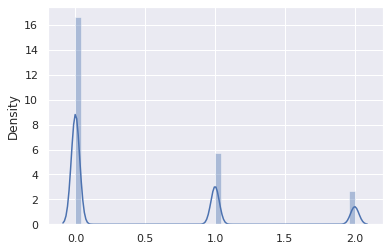

In [ ]:
df = TrainTest_new.select('LABEL')

sns.distplot(df.toPandas())

In [ ]:
TrainTest_new.select('LABEL').groupBy('LABEL').count().show()

+-----+-------+
|LABEL|  count|
+-----+-------+
|    1|1344850|
|    2| 625690|
|    0|3907678|
+-----+-------+



#### Data Stream

In [ ]:
# 0: DEP_DELAY <= 0 <=> Không bị trễ.
Stream_new = Stream.withColumn('DEP_DELAY', f.when(f.col('DEP_DELAY')<=0, 0).otherwise(f.col('DEP_DELAY')))
# 1: 0 < DEP_DELAY <= 30 minutes <=> Trễ từ 1 đến 30 phút.
Stream_new = Stream_new.withColumn('DEP_DELAY', f.when((f.col('DEP_DELAY')>0) & (f.col('DEP_DELAY')<=30), 1).otherwise(f.col('DEP_DELAY')))
# 2: DEP_DELAY > 30 minutes <=> Trễ hơn 30 phút hoặc hủy chuyến.
Stream_new = Stream_new.withColumn('DEP_DELAY', f.when(f.col('DEP_DELAY')>30, 2).otherwise(f.col('DEP_DELAY')))
# Đổi tên DEP_DELAY -> LABEL
Stream_new = Stream_new.withColumnRenamed('DEP_DELAY', 'LABEL')
# Chuyển kiểu dữ liệu FLOAT -> INT
Stream_new = Stream_new.withColumn('LABEL', f.col('LABEL').cast("INT"))

In [ ]:
Stream_new.printSchema()
Stream_new.show()

root
 |-- ID: string (nullable = true)
 |-- QUARTER: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAY_OF_MONTH: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- OP_UNIQUE_CARRIER: string (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- DISTANCE: double (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- LABEL: integer (nullable = true)

+--------------------+-------+-----+------------+-----------+-----------------+------+----+--------+------------+-----+
|                  ID|QUARTER|MONTH|DAY_OF_MONTH|DAY_OF_WEEK|OP_UNIQUE_CARRIER|ORIGIN|DEST|DISTANCE|CRS_DEP_TIME|LABEL|
+--------------------+-------+-----+------------+-----------+-----------------+------+----+--------+------------+-----+
|1/14/2022_YX_CMH_...|      1|    1|          14|          5|               YX|   CMH| DCA|   323.0|        1224|    0|
|1/15/2022_YX_CMH_...|      1|    1|          15|          6|      

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


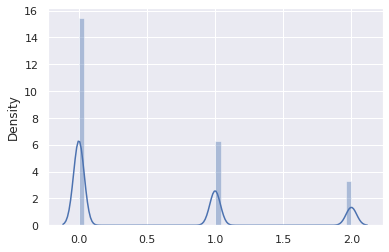

In [ ]:
df = Stream_new.select('LABEL')

sns.distplot(df.toPandas())

In [ ]:
Stream_new.select('LABEL').groupBy('LABEL').count().show()

+-----+-------+
|LABEL|  count|
+-----+-------+
|    1| 521964|
|    2| 271621|
|    0|1279917|
+-----+-------+



### Save data

In [ ]:
TrainTest_new.toPandas().to_csv(PATH+'TrainTest.csv')

Py4JJavaError: ignored

In [ ]:
Stream_new.toPandas().to_csv(PATH+'Stream.csv')